# Algerian Forest Fires Dataset

### Dataset Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region. 

The period from June 2012 to September 2012. 
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.

### Attribute information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations

2. Temp : temperature noon (temperature max)  in Celsius degrees: 22 to 42

3. RH : Relative Humidity in %: 21 to 90 

4. Ws :Wind speed in km/h: 6 to 29 

5. Rain: total day in mm: 0 to 16.8
FWI Components  

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5 

7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9 

8. Drought Code (DC) index from the FWI system:  7 to 220.4

9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5 

10. Buildup Index (BUI) index from the FWI system: 1.1 to 68

11. Fire Weather Index (FWI) Index: 0 to 31.1

12. Classes: two classes, namely   â€œFireâ€ and â€œnot Fireâ€

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'Data\Algerian_forest_fires_dataset_UPDATE.csv', header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## Data Cleaning

In [3]:
## missing values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


As the dataset is based on two regions so we will add a column for the two regions.

In [4]:
## Adding new column
df.loc[:122, 'Region']=0
df.loc[122:, 'Region']=1
df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1.0
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
245,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [6]:
df['Region'] = df.Region.astype('int')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [8]:
df = df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [9]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [10]:
df = df.drop(122).reset_index(drop=True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [11]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [12]:
## Fix spaces in column name
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

### Change the required data column as integer data type

In [13]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


### Changing the other columns to float datatype

In [14]:
objects = [column for column in df.columns if df[column].dtypes=='O']
objects

['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes']

In [15]:
for i in objects:
    if i != 'Classes':
        df[i] = df[i].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [16]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [17]:
df.to_csv('Data/Algerian_cleaned.csv', index=False)

In [18]:
## As the fire is not dependent on date and also we do not want to do the time analysis so we will drop dates from the dataset
df_new = df.drop(['day', 'month', 'year'], axis=1)
df_new.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### Handling Categorical data

In [19]:
df_new['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [20]:
df_new['Classes'] = df_new['Classes'].str.strip()
df_new['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [21]:
# Encoding of categories in calss
df_new['Classes'] = np.where(df_new['Classes']=='not fire', 0, 1)
df_new.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


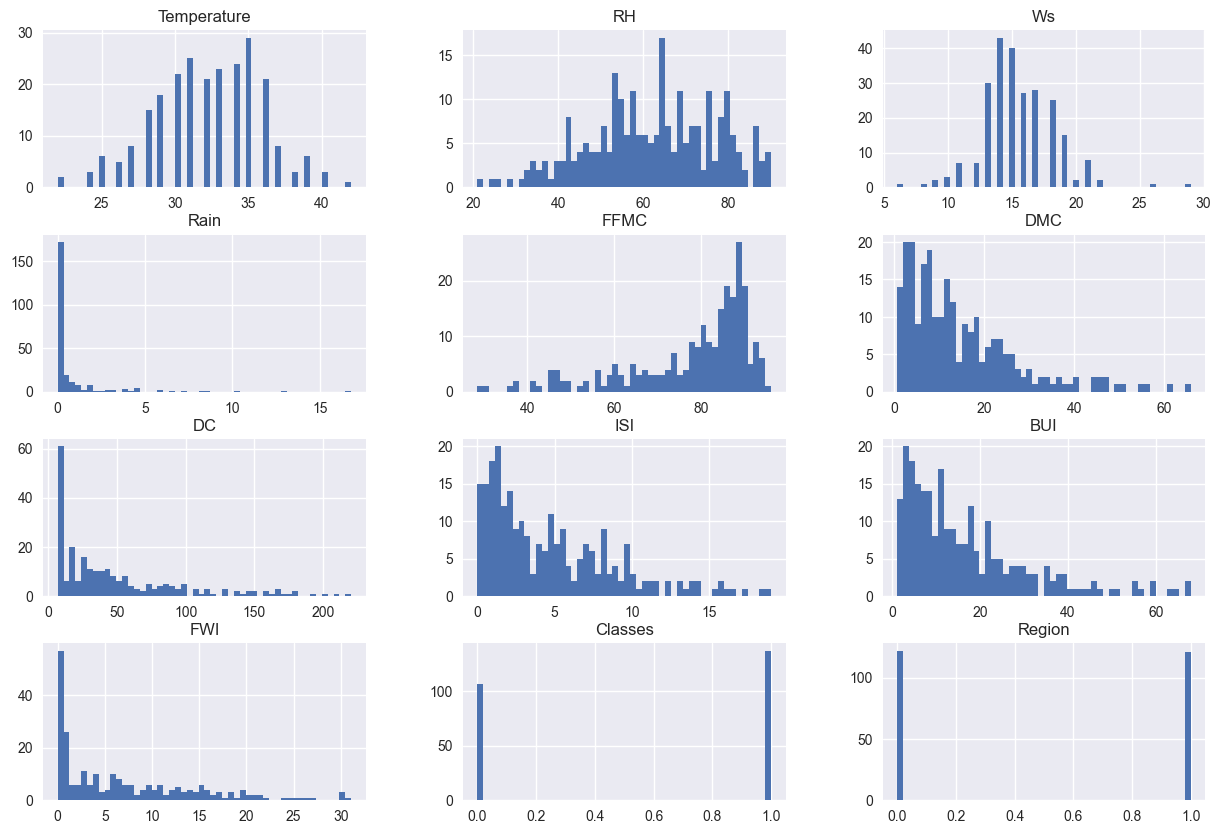

In [22]:
plt.style.use("seaborn-v0_8")
df_new.hist(bins=50, figsize=(15,10))
plt.show()

In [23]:
## Find out how much percentage is fire vs not fire in the dataset
percentage = df_new['Classes'].value_counts(normalize=True)*100
percentage

Classes
1    56.378601
0    43.621399
Name: proportion, dtype: float64

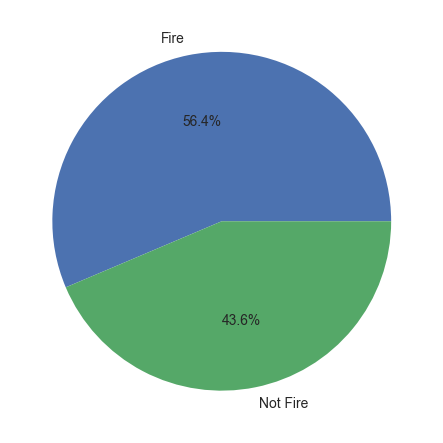

In [24]:
## Plot it using pie chart
plt.pie(percentage, labels=['Fire', 'Not Fire'], autopct='%1.1f%%')
plt.show()

In [25]:
## Correlation

df_new.corr()*100

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,100.000000,-65.140034,-28.450989,-32.649192,67.656815,48.568692,37.628353,60.387056,45.978947,56.666988,51.601549,26.955546
RH,-65.140034,100.000000,24.404838,22.235608,-64.487346,-40.851919,-22.694112,-68.666704,-35.384055,-58.095675,-43.216074,-40.268162
Ws,-28.450989,24.404838,100.000000,17.150618,-16.654827,-0.072097,7.913451,0.853169,3.143841,3.236777,-6.996363,-18.115952
Rain,-32.649192,22.235608,17.150618,100.000000,-54.390619,-28.877293,-29.802308,-34.748393,-29.985152,-32.442156,-37.909717,-4.001263
FFMC,67.656815,-64.487346,-16.654827,-54.390619,100.000000,60.360764,50.739666,74.000683,59.201101,69.113197,76.949230,22.224072
DMC,48.568692,-40.851919,-0.072097,-28.877293,60.360764,100.000000,87.592466,68.045433,98.224849,87.586416,58.565777,19.208879
DC,37.628353,-22.694112,7.913451,-29.802308,50.739666,87.592466,100.000000,50.864325,94.198846,73.952056,51.112333,-7.873397
ISI,60.387056,-68.666704,0.853169,-34.748393,74.000683,68.045433,50.864325,100.000000,64.409260,92.289493,73.519739,26.319709
BUI,45.978947,-35.384055,3.143841,-29.985152,59.201101,98.224849,94.198846,64.409260,100.000000,85.797310,58.663949,8.940833
FWI,56.666988,-58.095675,3.236777,-32.442156,69.113197,87.586416,73.952056,92.289493,85.797310,100.000000,71.921615,19.710233


<Axes: >

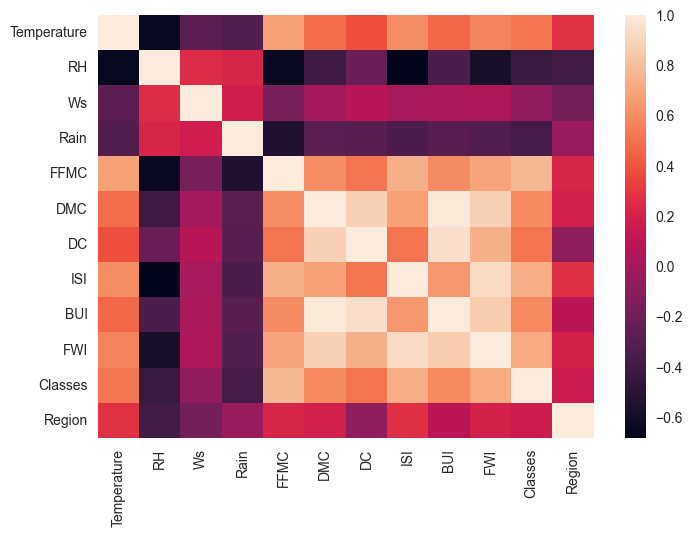

In [26]:
sns.heatmap(df_new.corr())

<Axes: xlabel='FWI'>

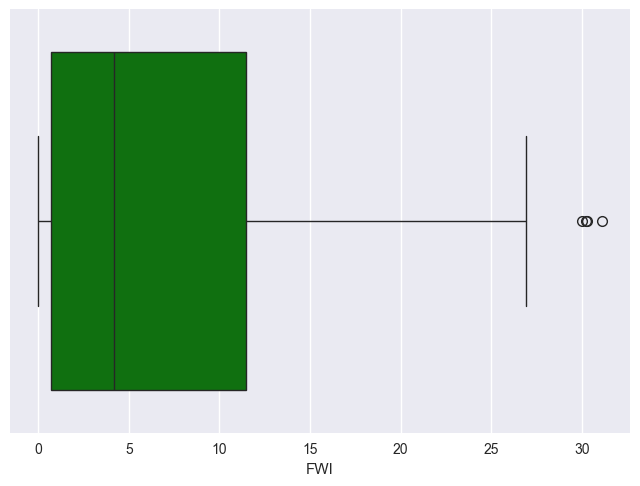

In [27]:
## Box plot to check outliers
sns.boxplot(df_new['FWI'], color='g', orient='h')

In [28]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


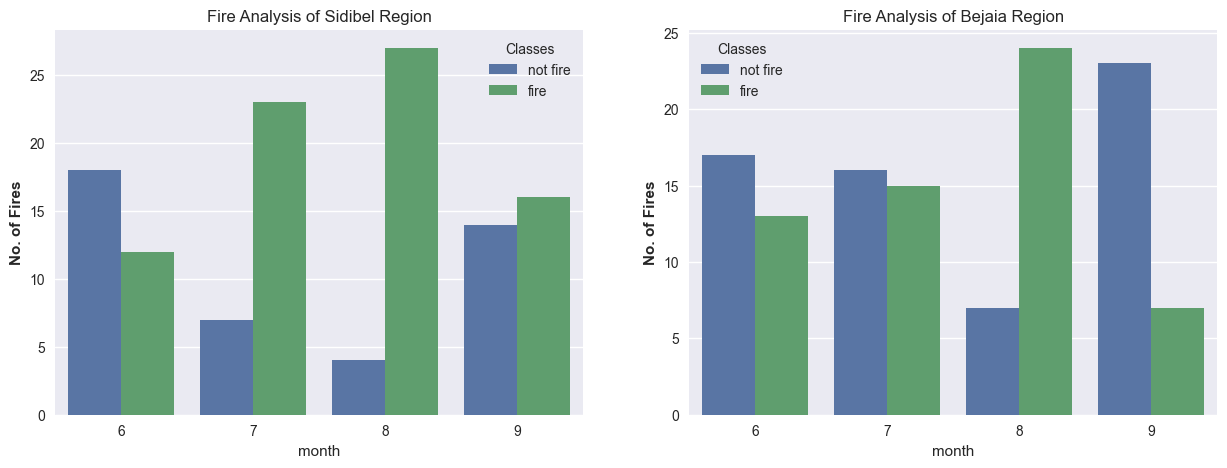

In [29]:
## Monthly Fire Analysis
df['Classes'] = df['Classes'].str.strip()

plt.subplots(1, 2, figsize=(15, 5), sharex=True)

plt.subplot(1,2,1)
sns.countplot(data=df[df['Region']==1], x=df['month'], hue='Classes')
plt.ylabel('No. of Fires', weight='bold')
plt.title('Fire Analysis of Sidibel Region')

plt.subplot(1, 2, 2)
sns.countplot(data=df[df['Region']==0], x='month', hue='Classes')
plt.ylabel('No. of Fires', weight='bold')
plt.title('Fire Analysis of Bejaia Region')

plt.show()

### August is the month with highest number of fires for both the region

# Model Training

In [30]:
df_new.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [31]:
## Independent and Dependent Features
X = df_new.drop(['FWI'], axis=1)
y = df_new['FWI']

In [32]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [33]:
## Train Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Feature Correlation

In [34]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<Axes: >

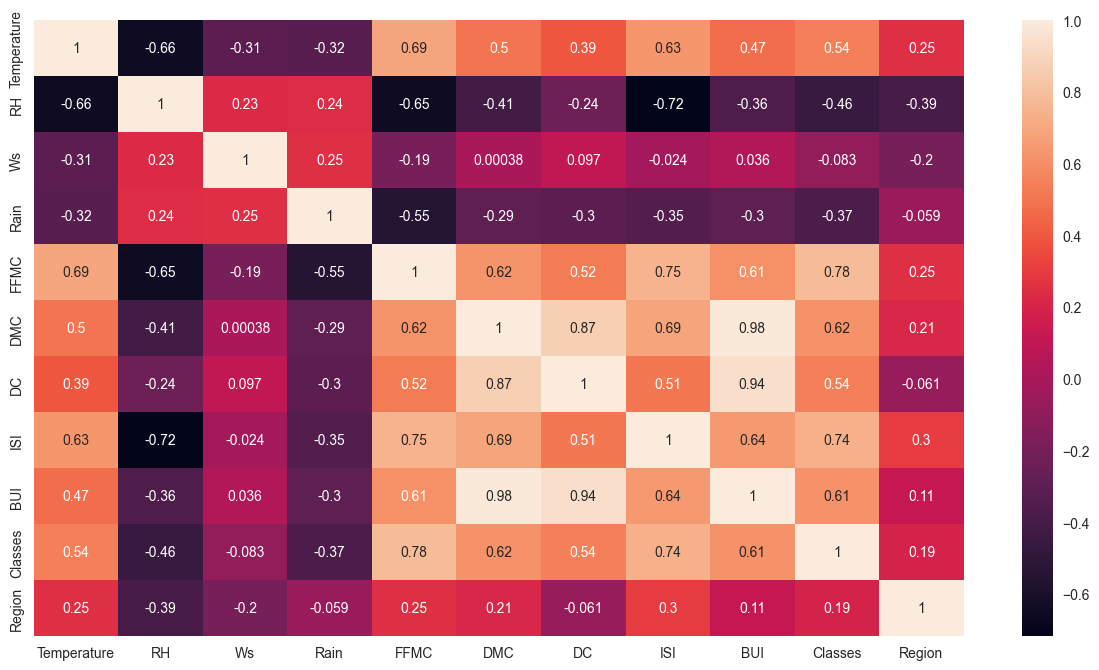

In [35]:
## Check multi coleanearity
plt.figure(figsize=(15, 8))
sns.heatmap(X_train.corr(), annot=True)

In [36]:
corr_df = X_train.corr()
corr_df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [37]:
## Find out the ones what are corelated more then 0.9 or 90%

threshold = 0.85 ## Will set up by the domain expert

correlated_features = corr_df[(corr_df>threshold) & (corr_df<1)].dropna(how='all', axis=1).dropna(how='all', axis=0)
correlated_features

,DMC,DC,BUI
DMC,NaN,0.868647,0.983175
DC,0.868647,NaN,0.942414
BUI,0.983175,0.942414,NaN


In [38]:
## Drop DC and BUI as the corelation is more then 0.85
X_train.drop(correlated_features.columns[1:], axis=1, inplace=True)
X_test.drop(correlated_features.columns[1:], axis=1, inplace=True)
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
97,29,74,19,0.1,75.8,3.6,2.1,0,0
141,31,72,14,0.2,60.2,3.8,0.8,0,1
192,40,31,15,0.0,94.2,22.5,16.6,1,1
68,32,60,18,0.3,77.1,11.3,2.2,0,0
119,32,47,14,0.7,77.5,7.1,1.8,0,0


### Feature Scaling

Here we will do standardization

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

Text(0.5, 1.0, 'X train After Scaling')

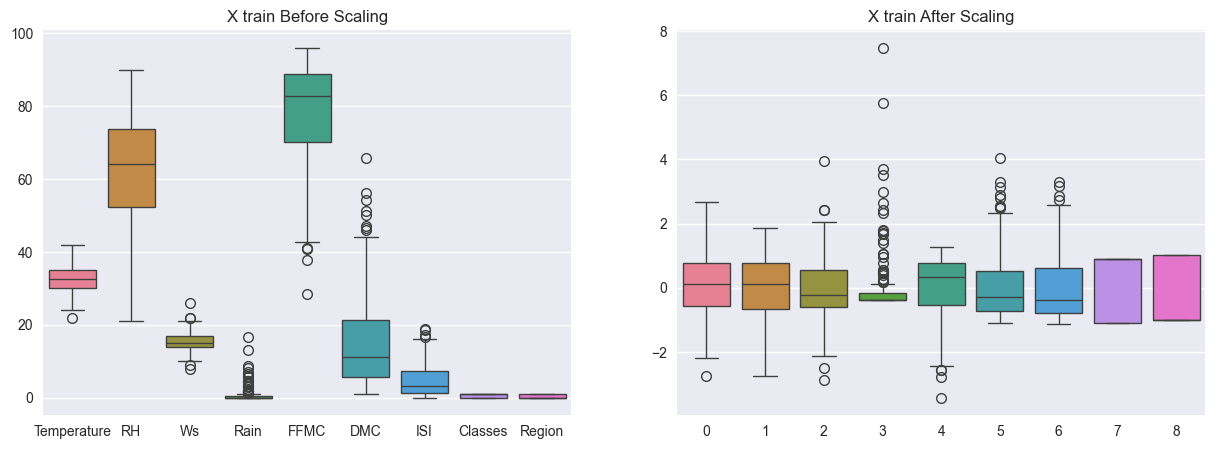

In [42]:
## Boxplot to understand effect of standard scaler

plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X train Before Scaling')

plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X train After Scaling')

Text(0.5, 1.0, 'X train After Scaling')

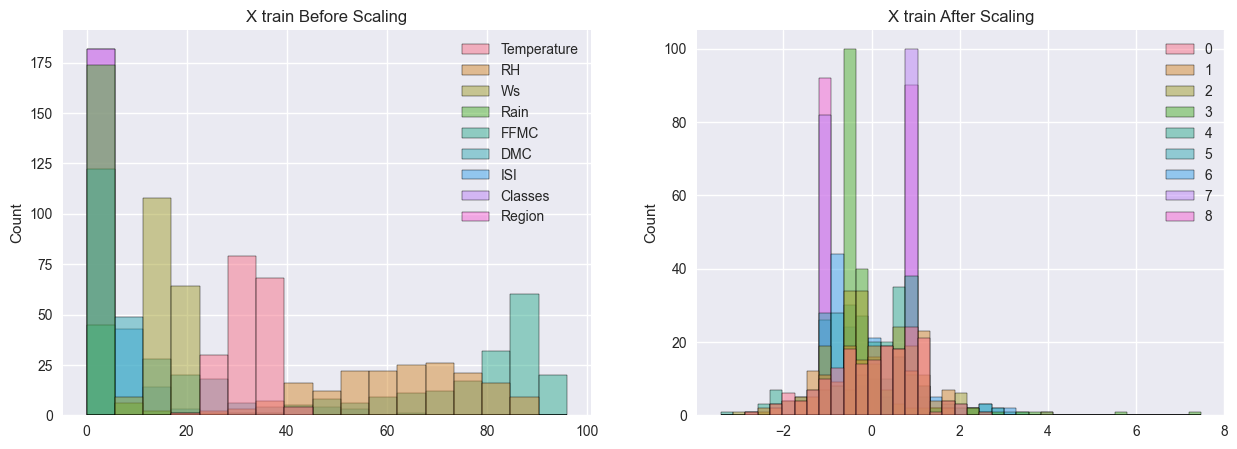

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(X_train)
plt.title('X train Before Scaling')

plt.subplot(1,2,2)
sns.histplot(X_train_scaled)
plt.title('X train After Scaling')


## Model training

1. Linear Regression

In [44]:
from sklearn.linear_model import LinearRegression

lin_regressor = LinearRegression()
lin_regressor.fit(X=X_train_scaled, y=y_train)

LinearRegression()

mean_squared_error: 0.6742766873791582, mean_absolute_error: 0.546823646524997, r2_score: 0.9847657384266951


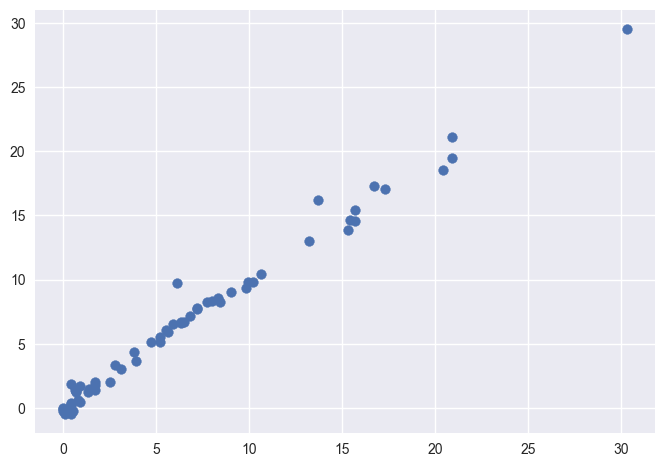

In [45]:
from  sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_predicted=lin_regressor.predict(X_test_scaled)

mean_squared_error = mean_squared_error(y_true=y_test, y_pred=y_predicted)
r2_score = r2_score(y_true=y_test, y_pred=y_predicted)
mean_absolute_error = mean_absolute_error(y_true=y_test, y_pred=y_predicted)

print(f'mean_squared_error: {mean_squared_error}, mean_absolute_error: {mean_absolute_error}, r2_score: {r2_score}')

plt.scatter(y_test, y_predicted)

2. Lasso Regression (L1 Regularization)

In [46]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()
lasso_regressor.fit(X_train_scaled, y_train)

Lasso()

mean_squared_error: 2.248345891897477, mean_absolute_error: 1.133175994914409, r2_score: 0.9492020263112388


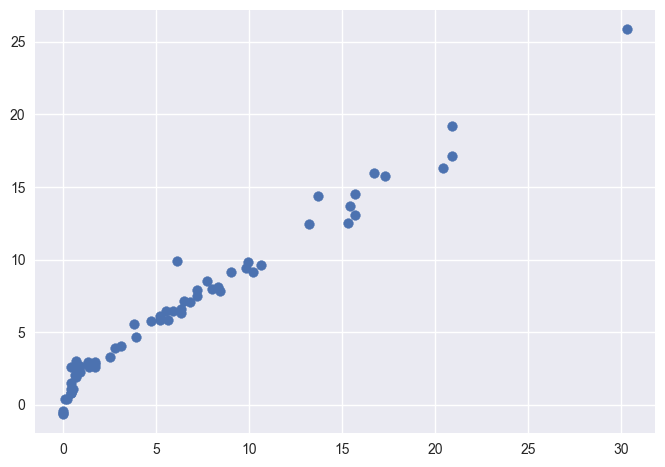

In [47]:
from  sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_predicted=lasso_regressor.predict(X_test_scaled)

mean_squared_error = mean_squared_error(y_true=y_test, y_pred=y_predicted)
r2_score = r2_score(y_true=y_test, y_pred=y_predicted)
mean_absolute_error = mean_absolute_error(y_true=y_test, y_pred=y_predicted)

print(f'mean_squared_error: {mean_squared_error}, mean_absolute_error: {mean_absolute_error}, r2_score: {r2_score}')

plt.scatter(y_test, y_predicted)

3. Ridge Regression (L2 Regularization)

In [48]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge()

ridge_regressor.fit(X_train_scaled, y_train)

Ridge()

mean_squared_error: 0.6949198918152073, mean_absolute_error: 0.5642305340105691, r2_score: 0.9842993364555513


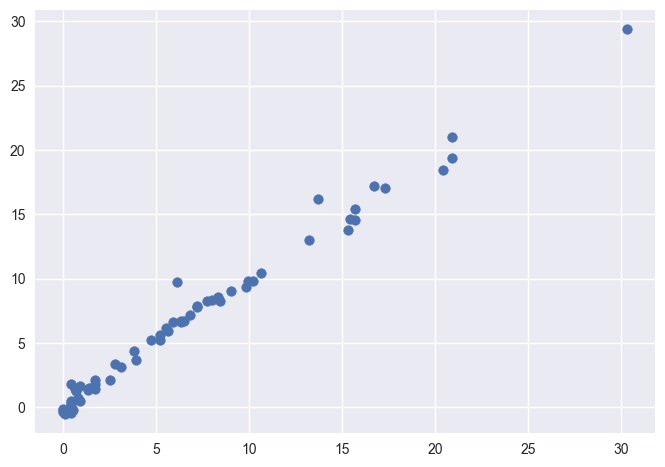

In [49]:
from  sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_predicted=ridge_regressor.predict(X_test_scaled)

mean_squared_error = mean_squared_error(y_true=y_test, y_pred=y_predicted)
r2_score = r2_score(y_true=y_test, y_pred=y_predicted)
mean_absolute_error = mean_absolute_error(y_true=y_test, y_pred=y_predicted)

print(f'mean_squared_error: {mean_squared_error}, mean_absolute_error: {mean_absolute_error}, r2_score: {r2_score}')

plt.scatter(y_test, y_predicted)

4. ElasticNET

In [50]:
from sklearn.linear_model import ElasticNet

elastic_regressor = ElasticNet()
elastic_regressor.fit(X_train_scaled, y_train)

ElasticNet()

mean_squared_error: 5.517251101025224, mean_absolute_error: 1.8822353634896, r2_score: 0.8753460589519703


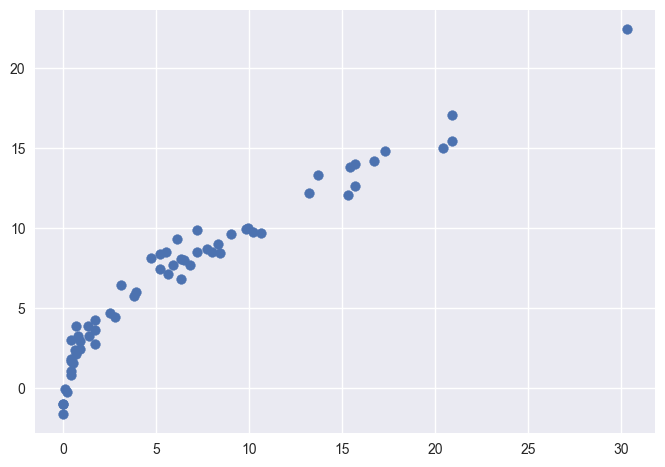

In [51]:
from  sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_predicted=elastic_regressor.predict(X_test_scaled)

mean_squared_error = mean_squared_error(y_true=y_test, y_pred=y_predicted)
r2_score = r2_score(y_true=y_test, y_pred=y_predicted)
mean_absolute_error = mean_absolute_error(y_true=y_test, y_pred=y_predicted)

print(f'mean_squared_error: {mean_squared_error}, mean_absolute_error: {mean_absolute_error}, r2_score: {r2_score}')

plt.scatter(y_test, y_predicted)

### Hyperparameter Tuning

In [52]:
from sklearn.linear_model import LassoCV

lassocv_regressor = LassoCV(cv=5)
lassocv_regressor.fit(X_train_scaled, y_train)

LassoCV(cv=5)

mean_squared_error: 0.7924995554743625, mean_absolute_error: 0.6199701158263431, r2_score: 0.9820946715928275


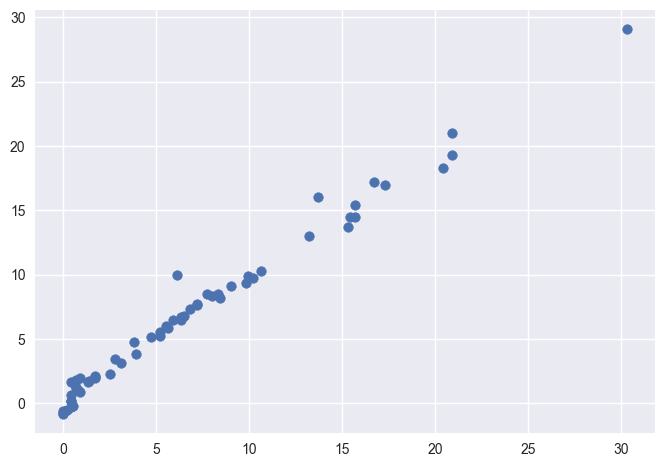

In [53]:
from  sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_predicted=lassocv_regressor.predict(X_test_scaled)

mean_squared_error = mean_squared_error(y_true=y_test, y_pred=y_predicted)
r2_score = r2_score(y_true=y_test, y_pred=y_predicted)
mean_absolute_error = mean_absolute_error(y_true=y_test, y_pred=y_predicted)

print(f'mean_squared_error: {mean_squared_error}, mean_absolute_error: {mean_absolute_error}, r2_score: {r2_score}')

plt.scatter(y_test, y_predicted)

### Model Pickling

In [78]:
import pickle

pickle.dump(scaler, open(r'algerian_scaler.pkl', 'wb'))
pickle.dump(ridge_regressor, open(r'algerian_regressor.pkl', 'wb'))